# Lines (ggplot2)
Credits: http://www.cookbook-r.com/ (Creative Commons Attribution-Share Alike 3.0 Unported License)

## Problem
You want to do add lines to a plot.

## Solution
### With one continuous and one categorical axis

In [1]:
# Some sample data
dat <- read.table(header=TRUE, text='
     cond result
  control     10
treatment   11.5
')

library(ggplot2)

### Lines that go all the way across

These use `geom_hline` because the y-axis is the continuous one, but it is also possible to use `geom_vline` (with `xintercept`) if the x-axis is continuous.

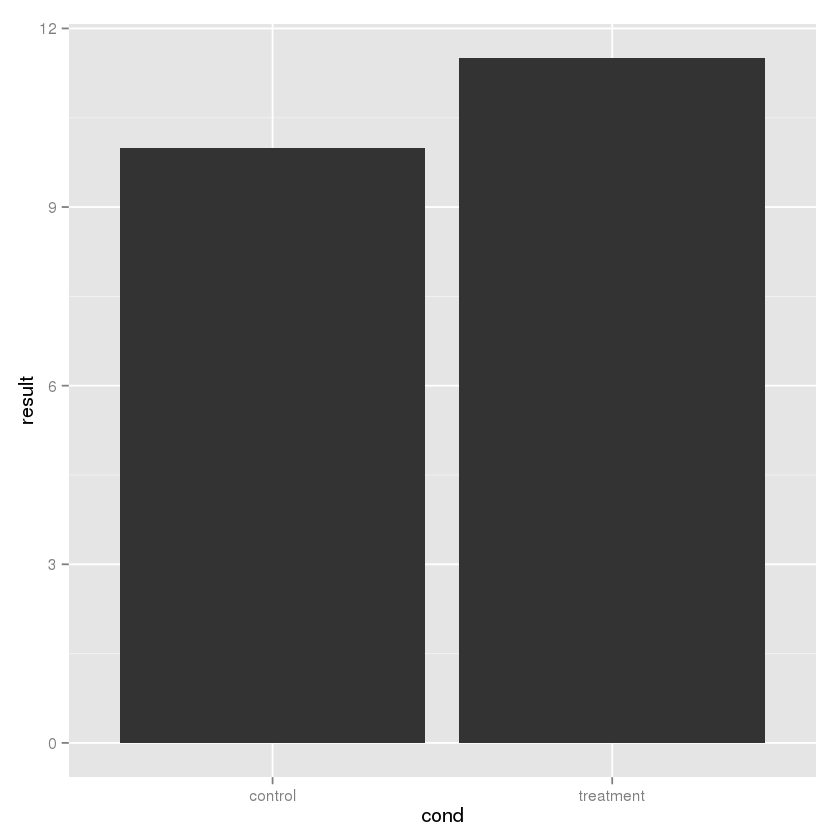

In [2]:
# Basic bar plot
bp <- ggplot(dat, aes(x=cond, y=result)) +
    geom_bar(position=position_dodge(), stat="identity")
bp

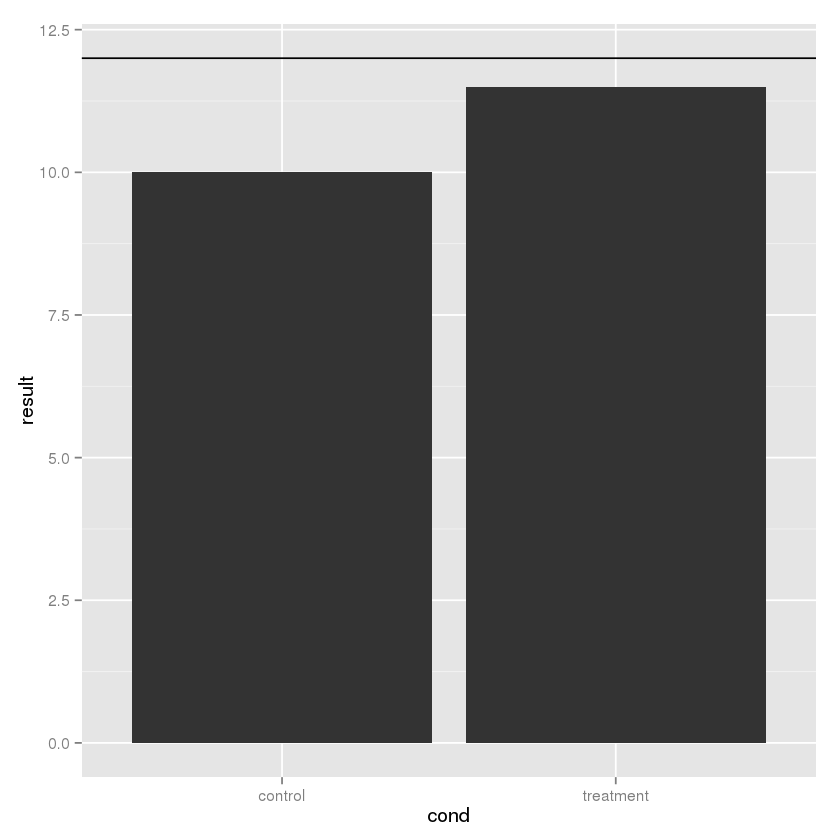

In [3]:
# Add a horizontal line
bp + geom_hline(aes(yintercept=12))

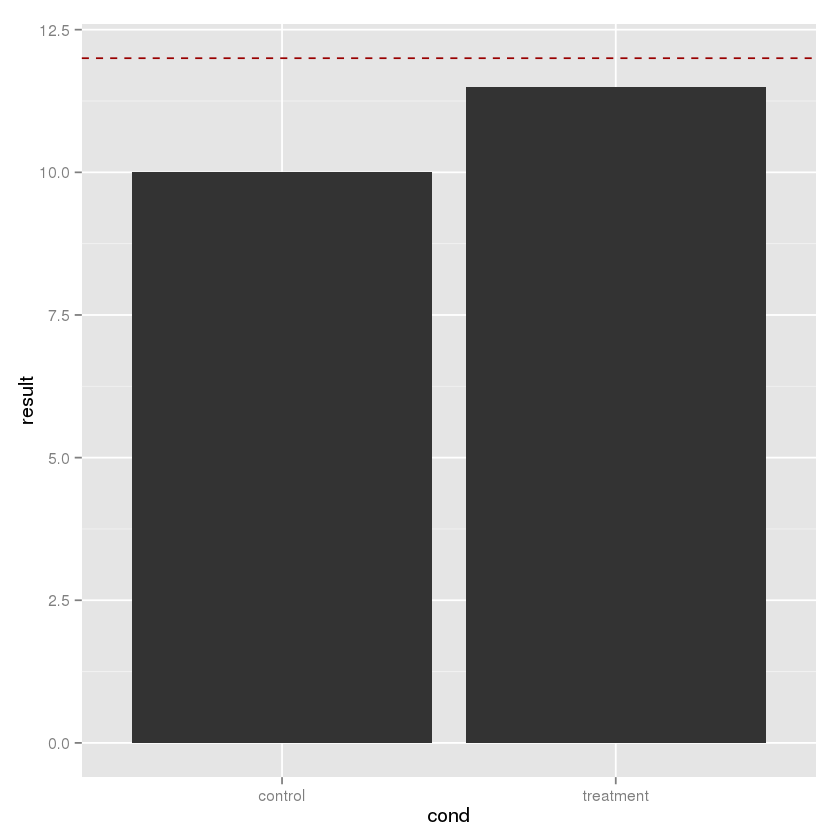

In [4]:
# Make the line red and dashed
bp + geom_hline(aes(yintercept=12), colour="#990000", linetype="dashed")

### Separate lines for each categorical value

To make separate lines for each bar, use `geom_errorbar`. The error bars have no height `– ymin=ymax`. It also seems necessary to specify `y` for some reason, even though it doesn’t do anything.

In [5]:
# Draw separate hlines for each bar. First add another column to dat
dat$hline <- c(9,12)
dat

,cond,result,hline
1,control,10,9
2,treatment,11.5,12


In [6]:
# Need to re-specify bp, because the data has changed
bp <- ggplot(dat, aes(x=cond, y=result)) +
    geom_bar(position=position_dodge(), stat="identity")

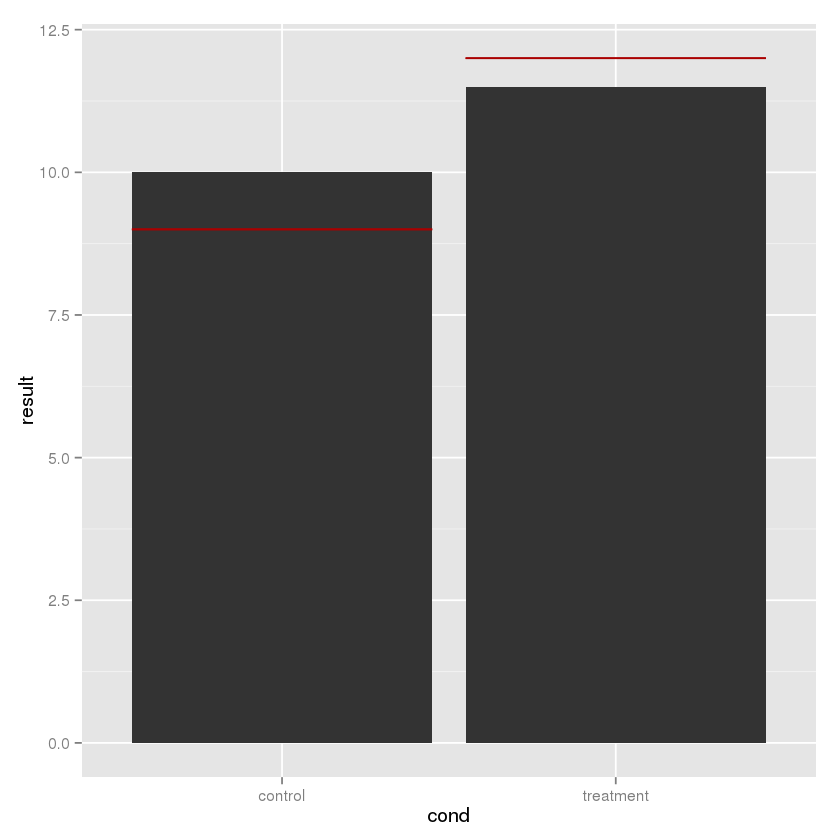

In [7]:
# Draw with separate lines for each bar
bp + geom_errorbar(aes(y=hline, ymax=hline, ymin=hline), colour="#AA0000")

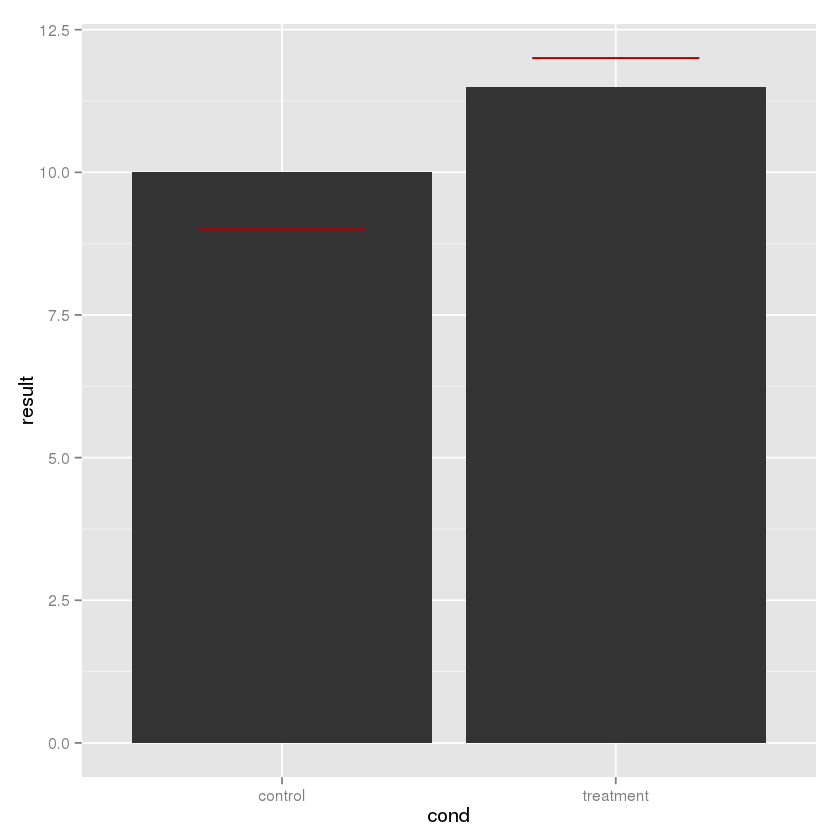

In [8]:
# Make the lines narrower
bp + geom_errorbar(width=0.5, aes(y=hline, ymax=hline, ymin=hline), colour="#AA0000")

In [9]:
# Can get the same result, even if we get the hline values from a second data frame
# Define data frame with hline
dat_hlines <- data.frame(cond=c("control","treatment"), hline=c(9,12))
dat_hlines

,cond,hline
1,control,9
2,treatment,12


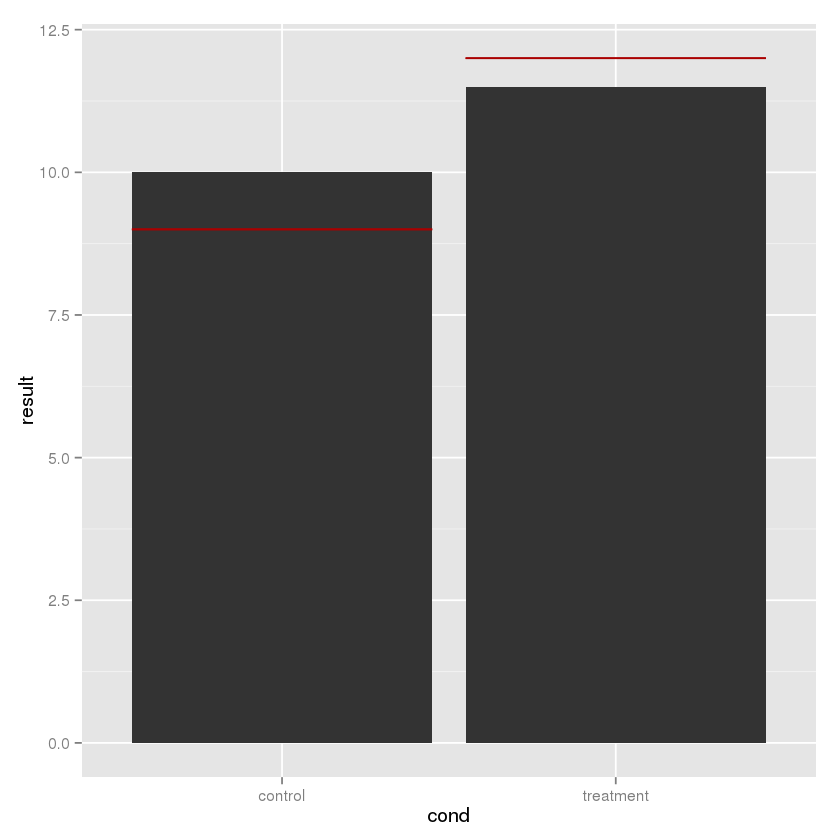

In [10]:
# The bar graph are from dat, but the lines are from dat_hlines
bp + geom_errorbar(data=dat_hlines, aes(y=hline, ymax=hline, ymin=hline), colour="#AA0000")

### Lines over grouped bars

It is possible to add lines over grouped bars. In this example, there are actually four lines (one for each entry for `hline`), but it looks like two, because they are drawn on top of each other. I don’t think it’s possible to avoid this, but it doesn’t cause any problems.

In [11]:
dat <- read.table(header=TRUE, text='
     cond group result hline
  control     A     10     9
treatment     A   11.5    12
  control     B     12     9
treatment     B     14    12
')
dat

,cond,group,result,hline
1,control,A,10,9
2,treatment,A,11.5,12
3,control,B,12,9
4,treatment,B,14,12


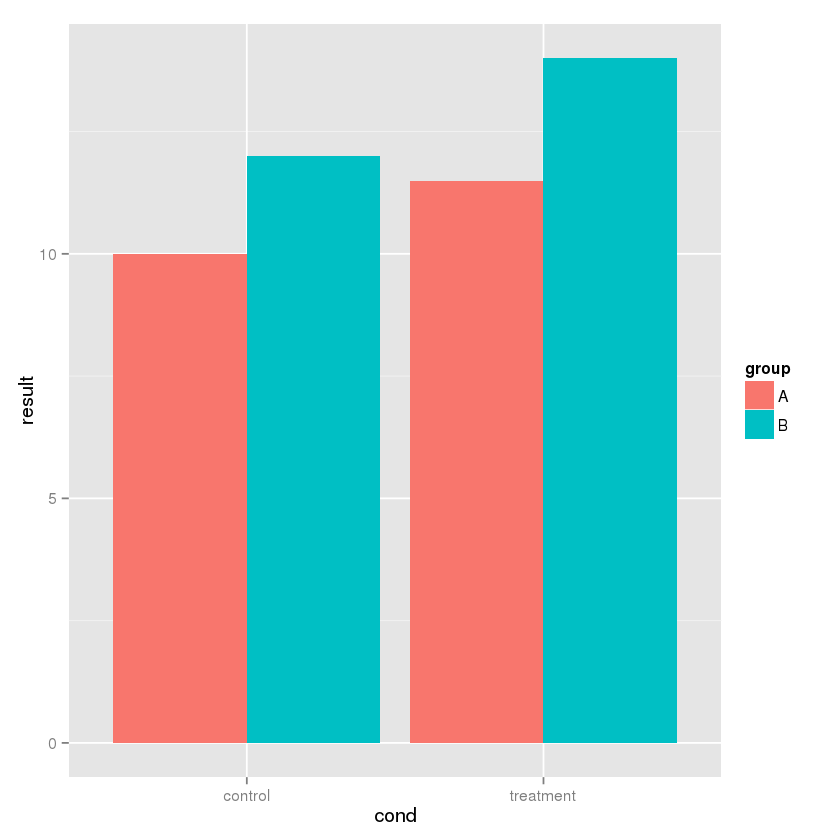

In [12]:
# Define basic bar plot
bp <- ggplot(dat, aes(x=cond, y=result, fill=group)) +
    geom_bar(position=position_dodge(), stat="identity")
bp

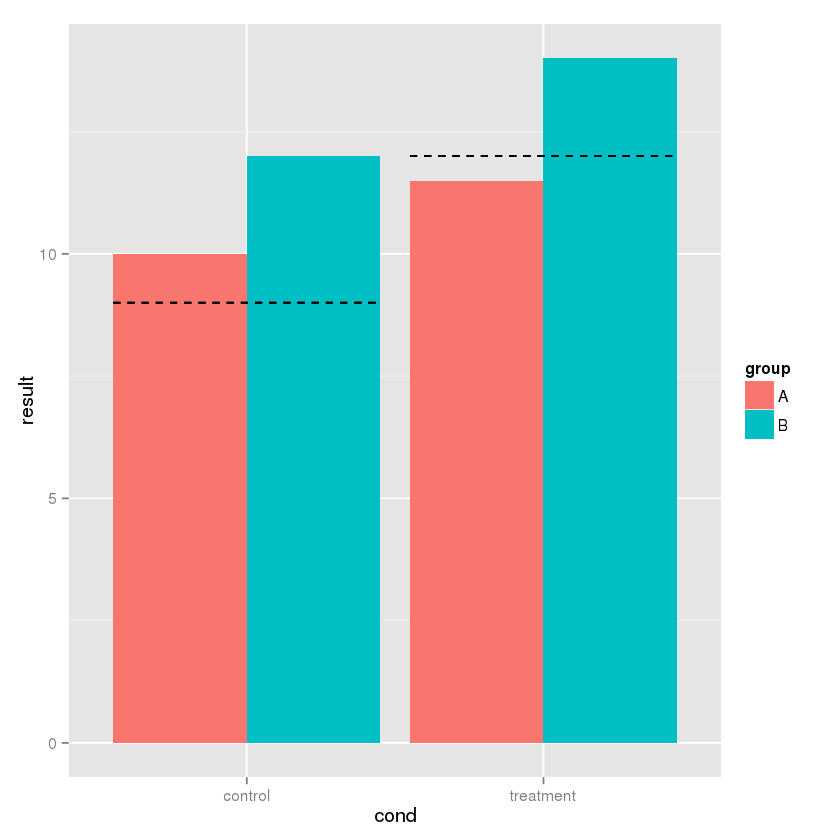

In [13]:
# The error bars get plotted over one another -- there are four but it looks
# like two
bp + geom_errorbar(aes(y=hline, ymax=hline, ymin=hline), linetype="dashed")

### Lines over individual grouped bars

It is also possible to have lines over each individual bar, even when grouped.

In [14]:
dat <- read.table(header=TRUE, text='
     cond group result hline
  control     A     10    11
treatment     A   11.5    12
  control     B     12  12.5
treatment     B     14    15
')

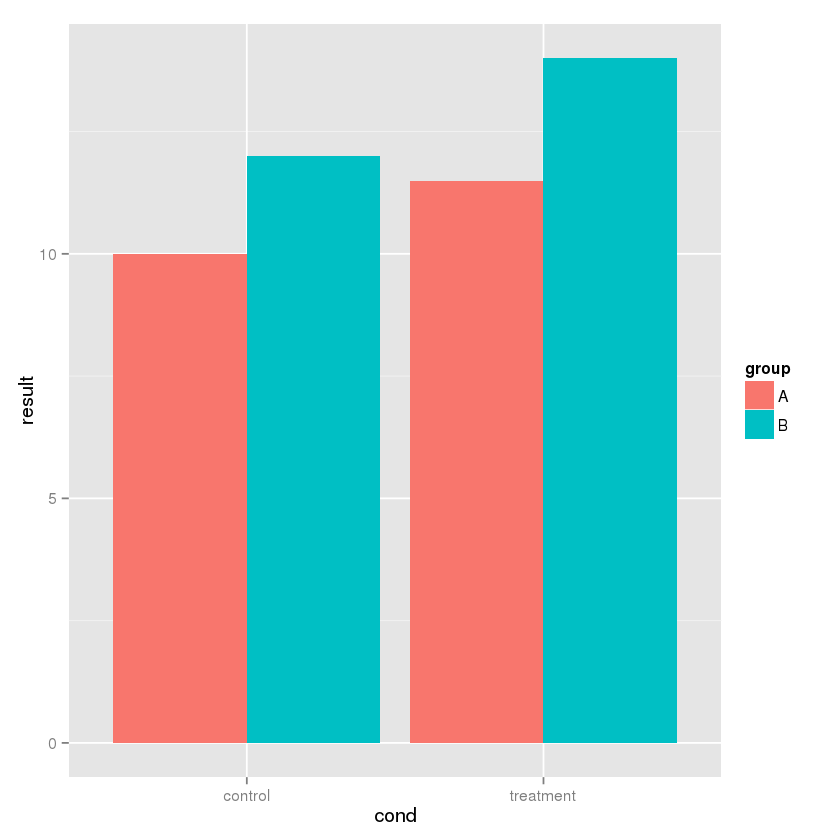

In [15]:
# Define basic bar plot
bp <- ggplot(dat, aes(x=cond, y=result, fill=group)) +
    geom_bar(position=position_dodge(), stat="identity")
bp

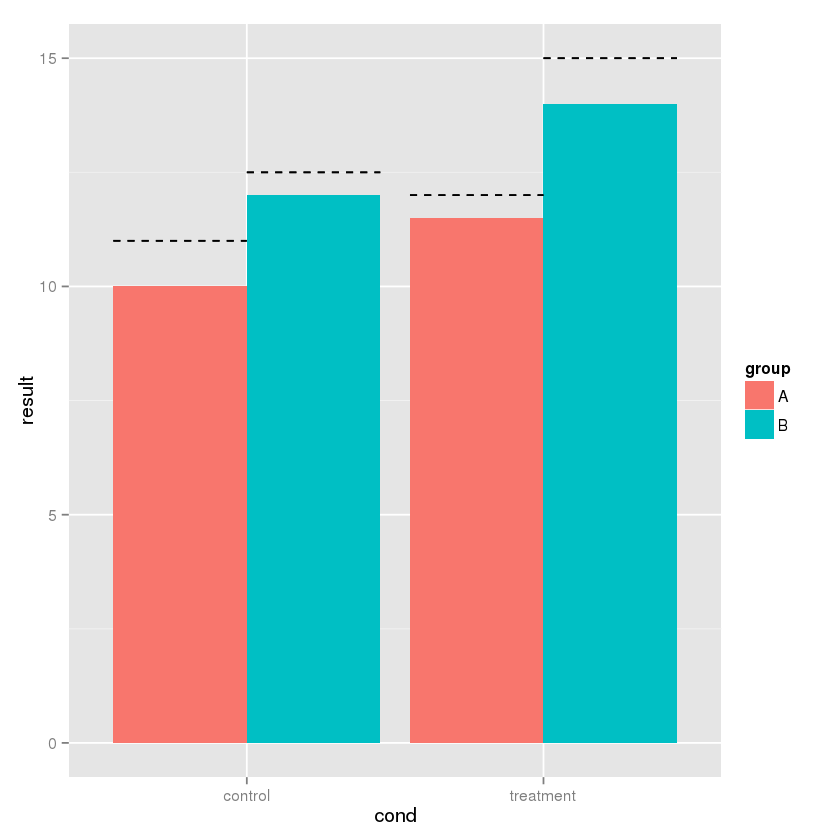

In [16]:
bp + geom_errorbar(aes(y=hline, ymax=hline, ymin=hline), linetype="dashed",
                   position=position_dodge())

In [17]:
### With two continuous axes

Sample data used here:

ERROR: Error in parse(text = x, srcfile = src): <text>:3:8: unexpected symbol
2: 
3: Sample data
          ^


In [18]:
dat <- read.table(header=TRUE, text='
      cond xval yval
   control 11.5 10.8
   control  9.3 12.9
   control  8.0  9.9
   control 11.5 10.1
   control  8.6  8.3
   control  9.9  9.5
   control  8.8  8.7
   control 11.7 10.1
   control  9.7  9.3
   control  9.8 12.0
 treatment 10.4 10.6
 treatment 12.1  8.6
 treatment 11.2 11.0
 treatment 10.0  8.8
 treatment 12.9  9.5
 treatment  9.1 10.0
 treatment 13.4  9.6
 treatment 11.6  9.8
 treatment 11.5  9.8
 treatment 12.0 10.6
')


### Basic lines

In [19]:
# The basic scatterplot
sp <- ggplot(dat, aes(x=xval, y=yval, colour=cond)) + geom_point()

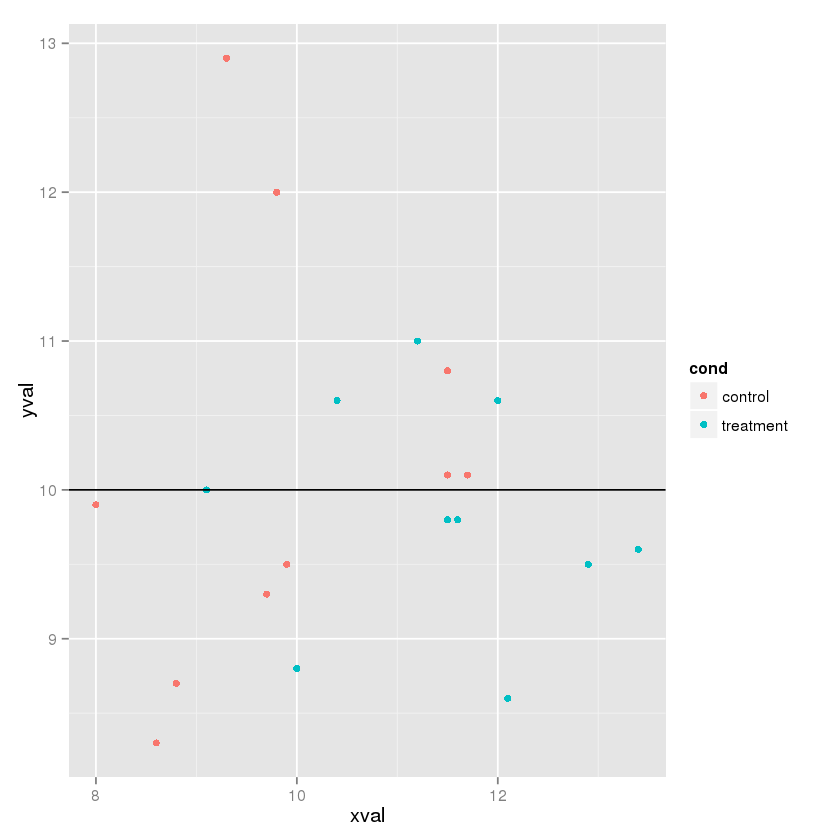

In [20]:
# Add a horizontal line
sp + geom_hline(aes(yintercept=10))

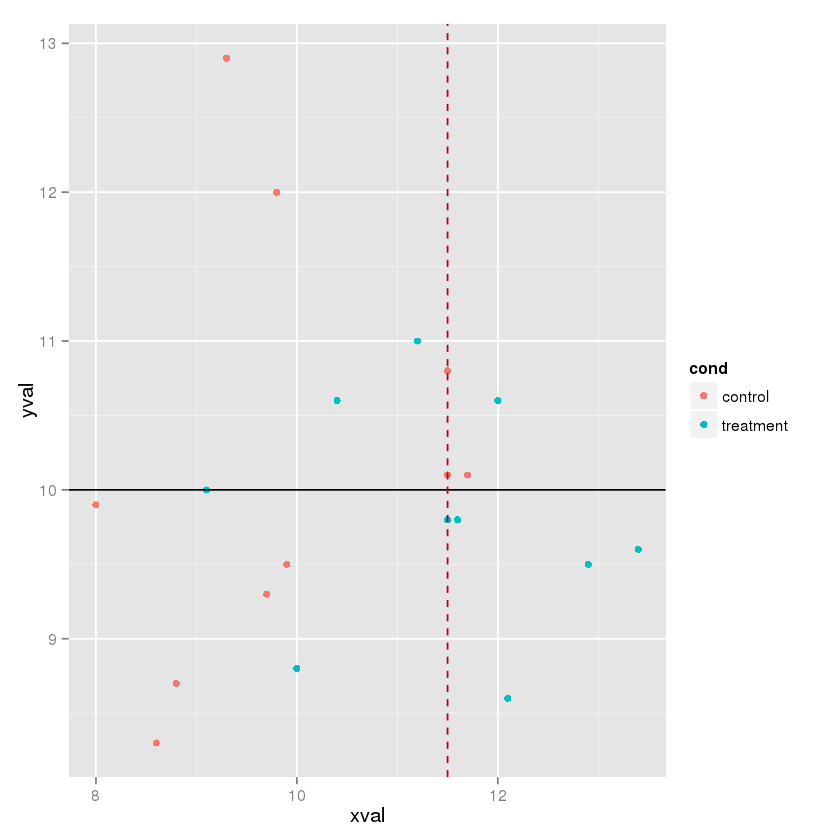

In [21]:
# Add a red dashed vertical line
sp + geom_hline(aes(yintercept=10)) +
    geom_vline(aes(xintercept=11.5), colour="#BB0000", linetype="dashed")

### Automatically drawing lines for the mean

It is also possible to automatically compute a mean value for each group, divided one some variable. Note that the y range of the line is determined by the data.

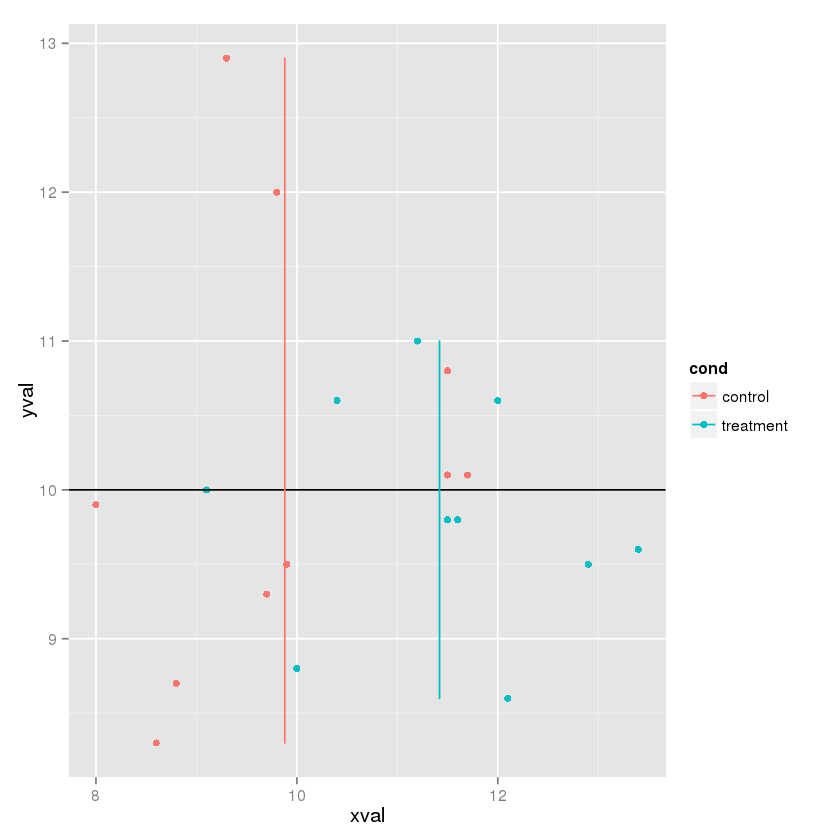

In [22]:
# Add colored lines for the mean xval of each group
sp + geom_hline(aes(yintercept=10)) +
     geom_line(stat="vline", xintercept="mean")

### Using lines with facets

Normally, if you add a line, it will appear in all facets.

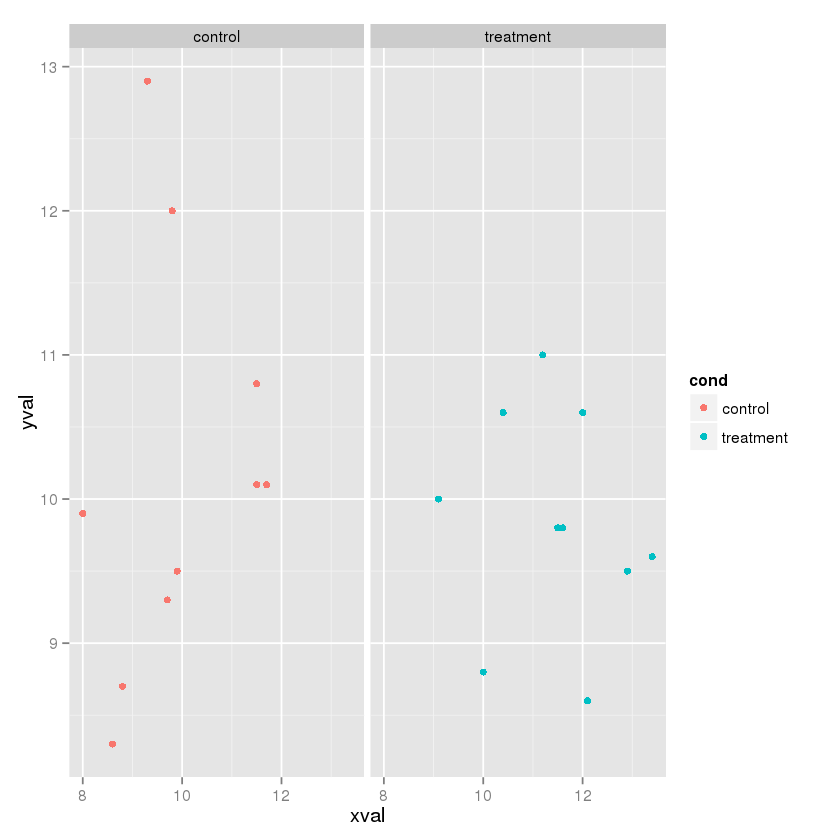

In [23]:
# Facet, based on cond
spf <- sp + facet_grid(. ~ cond)
spf

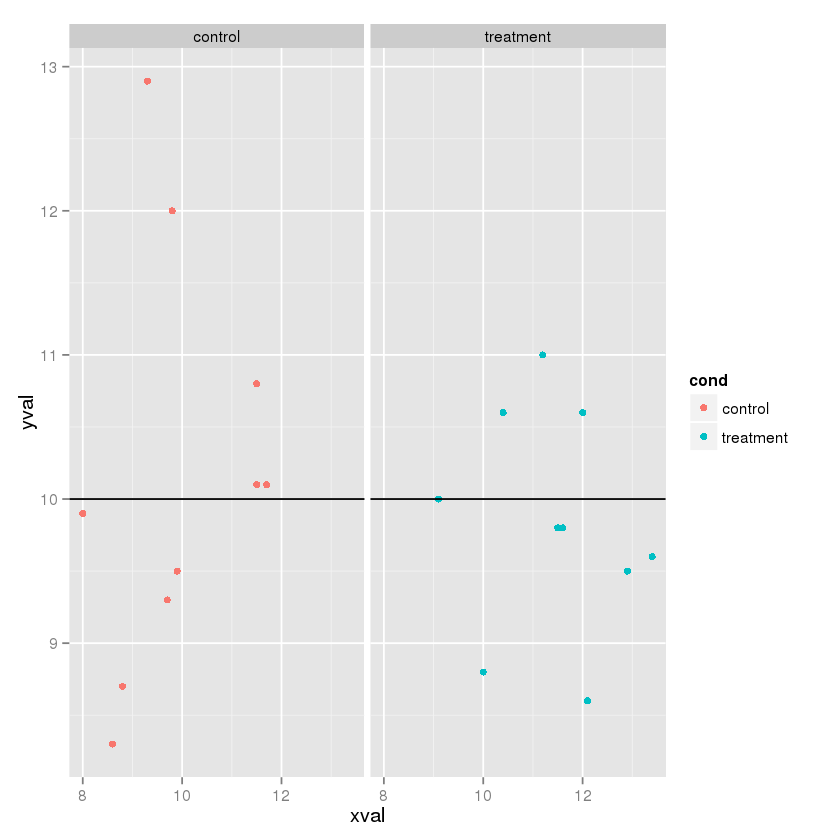

In [24]:
# Draw a horizontal line in all of the facets at the same value
spf + geom_hline(aes(yintercept=10))

If you want the different lines to appear in the different facets, there are two options. One is to create a new data frame with the desired values for the lines. Another option (with more limited control) is to use `stat` and `xintercept` in `geom_line()`.

In [25]:
dat_vlines <- data.frame(cond=levels(dat$cond), xval=c(10,11.5))
dat_vlines

,cond,xval
1,control,10
2,treatment,11.5


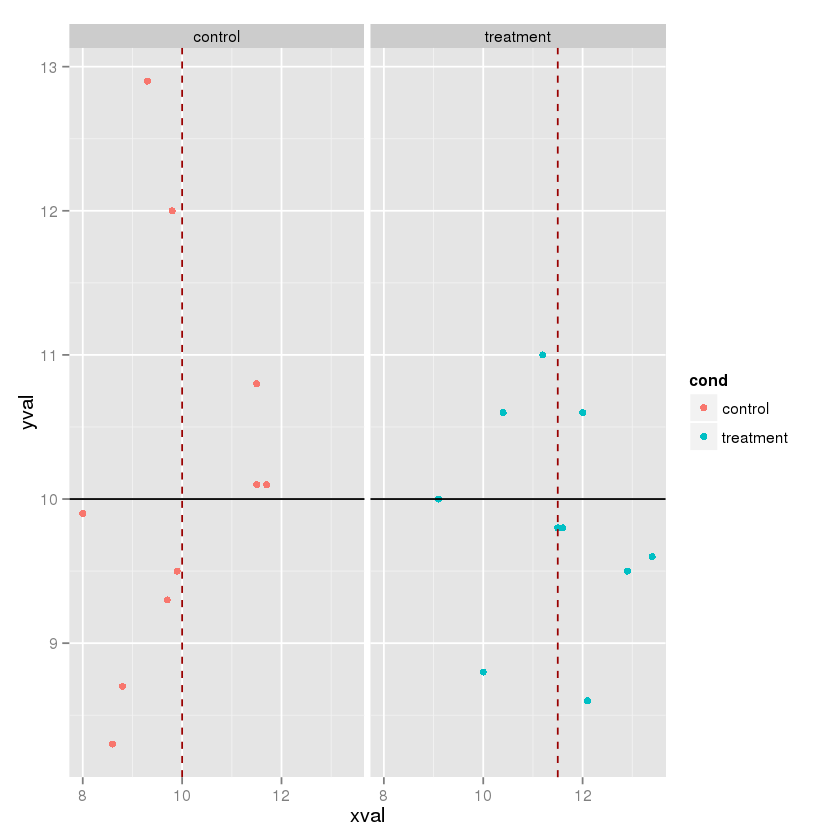

In [26]:
spf + geom_hline(aes(yintercept=10)) +
      geom_vline(aes(xintercept=xval), data=dat_vlines,
                    colour="#990000", linetype="dashed")

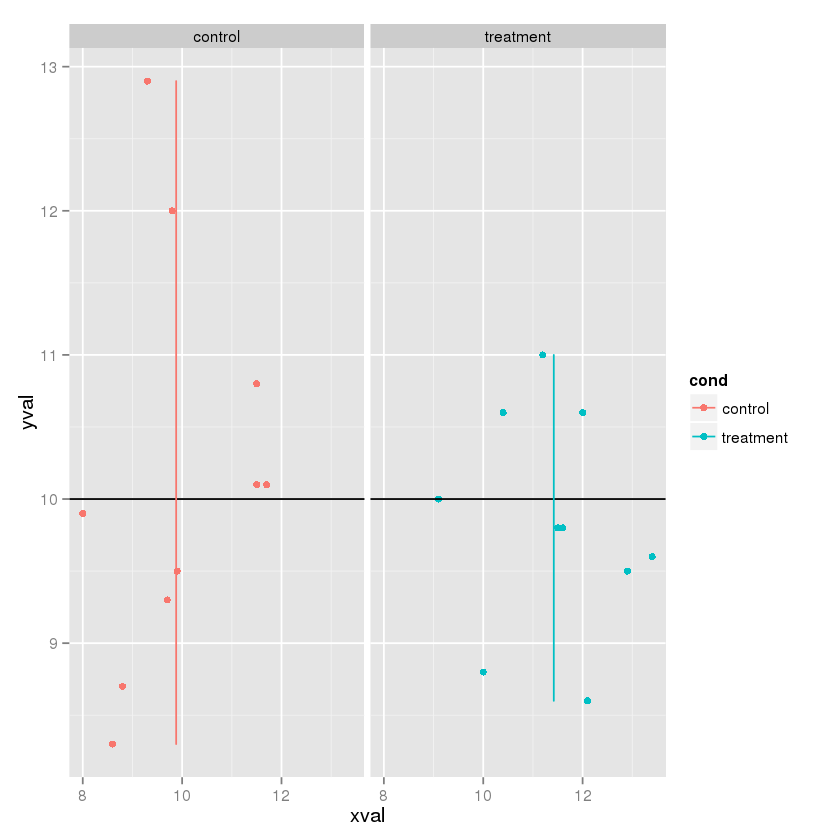

In [27]:
spf + geom_hline(aes(yintercept=10)) +
      geom_line(stat="vline", xintercept="mean")